In [1]:
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import sem
from scipy.stats import linregress
from sklearn import datasets
import pandas as pd
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.ticker as ticker

In [2]:
# CSV filepath
clean_data = "Resource/movie_clean.csv"
# Create dataframe from CSV
clean_data_df = pd.read_csv(clean_data)
clean_data_df

,Rank,Title,Duration (min),Rating,Director,Cast,Release Date,Production Cost,Worldwide Gross,Opening Weekend,MPAA,Genre
0,0,Avengers: Endgame,181.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Evans, Mar...",2019-04-23,400000000,2797800564,357115007.0,PG-13,Action
1,1,Pirates of the Caribbean: On Stranger Tides,137.0,6.6,Rob Marshall,"Johnny Depp, Penélope Cruz, Ian McShane, Geoff...",2011-05-20,379000000,1045713802,90151958.0,PG-13,Adventure
2,2,Avengers: Age of Ultron,141.0,7.3,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015-04-22,365000000,1395316979,191271109.0,PG-13,Action
3,4,Avengers: Infinity War,149.0,8.4,Anthony Russo,"Joe Russo, Robert Downey Jr., Chris Hemsworth,...",2018-04-25,300000000,2048359754,257698183.0,PG-13,Action
4,6,Justice League,120.0,6.1,Zack Snyder,"Ben Affleck, Gal Gadot, Jason Momoa, Ezra Miller",2017-11-13,300000000,655945209,93842239.0,PG-13,Action
...,...,...,...,...,...,...,...,...,...,...,...,...
455,544,A Good Day to Die Hard,98.0,5.2,John Moore,"Bruce Willis, Jai Courtney, Sebastian Koch, Ma...",2013-02-06,92000000,304249198,24834845.0,R,Action
456,545,The Alamo,162.0,6.8,John Wayne,"John Wayne, Richard Widmark, Laurence Harvey, ...",2004-04-09,92000000,23911362,9124701.0,PG-13,Western
457,546,The Alamo,137.0,6.0,John Lee Hancock,"Dennis Quaid, Billy Bob Thornton, Emilio Echev...",2004-04-09,92000000,23911362,9124701.0,PG-13,Western
458,547,Cutthroat Island,124.0,5.7,Renny Harlin,"Geena Davis, Matthew Modine, Frank Langella, M...",1995-12-22,92000000,18517322,2371415.0,PG-13,Adventure


In [3]:
# Assign Values and change to numeric values
worldwide_gross = clean_data_df['Worldwide Gross']
opening_weekend = clean_data_df['Opening Weekend']
production_cost = clean_data_df['Production Cost']
worldwide_gross = pd.to_numeric(worldwide_gross, errors='coerce')
opening_weekend = pd.to_numeric(opening_weekend, errors='coerce')
production_cost = pd.to_numeric(production_cost, errors='coerce')

Probability value (p): 1.1732375158209335e-107


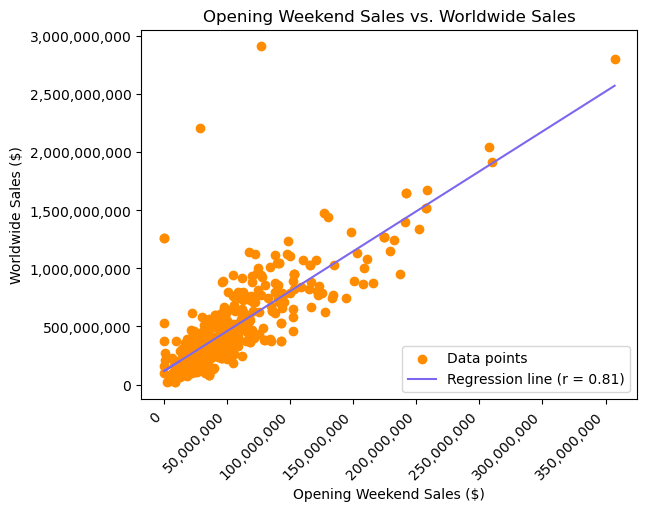

In [4]:
# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err = linregress(opening_weekend, worldwide_gross)
# Calculate the regression line values
regression_line = slope * opening_weekend + intercept
#Print p-value
print(f'Probability value (p): {p_value}')
# Plot the scatter plot
plt.scatter(opening_weekend, worldwide_gross, color='darkorange', label='Data points')
plt.plot(opening_weekend, regression_line, color='mediumslateblue', label=f'Regression line (r = {r_value:.2f})')
# Add titles and labels
plt.title('Opening Weekend Sales vs. Worldwide Sales')
plt.xlabel('Opening Weekend Sales ($)')
plt.ylabel('Worldwide Sales ($)') 
# Change format of axis to show whole numbers with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y):,}'))
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Add legend
plt.legend()
# Save image to Visuals folder
plt.savefig("movie_analysis_visualizations/openingvworldwide.png", bbox_inches='tight')
# Show the plot
plt.show()

Probability value (p): 3.286247452168757e-38


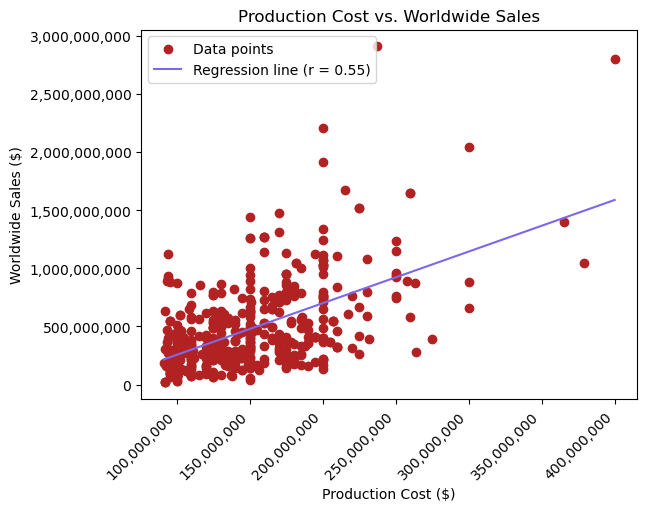

In [5]:
# Perform linear regression using scipy
slope, intercept, r_value, p_value, std_err = linregress(production_cost, worldwide_gross)
# Calculate the regression line values
regression_line1 = slope * production_cost + intercept
#Print p-value
print(f'Probability value (p): {p_value}')
# Plot the scatter plot
plt.scatter(production_cost, worldwide_gross, color='firebrick', label='Data points')
plt.plot(production_cost, regression_line1, color='mediumslateblue', label=f'Regression line (r = {r_value:.2f})')
# Add titles and labels
plt.title('Production Cost vs. Worldwide Sales')
plt.xlabel('Production Cost ($)')
plt.ylabel('Worldwide Sales ($)') 
# Change format of axis to show whole numbers with commas
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: f'{int(y):,}'))
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
# Add legend
plt.legend()
# Save image to Visuals folder
plt.savefig("movie_analysis_visualizations/costvsales.png", bbox_inches='tight')
# Show the plot
plt.show()